# ***Fraud Detection on Bank Payments***

**The data utilized for this analysis was sourced from Youdata.ai.**

**Dataset link : https://www.youdata.ai/yourdata/667915b9d0426022336d180c**

**Metadata/Data details :**
As we can see in the first rows below the dataset has 9 feature columns and a target column. The feature columms are :

**•	Step:** This feature represents the day from the start of simulation. It has 180 steps so simulation ran for virtually 6 months.

**•	Customer:** This feature represents the customer id

**•	zipCodeOrigin:** The zip code of origin/source.

**•	Merchant:** The merchant's id

**•	zipMerchant:** The merchant's zip code

**•	Age:** Categorized age
* 0: <= 18,
* 1: 19-25,
* 2: 26-35,
* 3: 36-45,
* 4: 46:55,
* 5: 56:65,
* 6: > 65
* U: Unknown

**•	Gender:** Gender for customer
* E : Enterprise,
* F: Female,
* M: Male,
* U: Unknown

**•	Category:** Category of the purchase. I won't write all categories here, we'll see them later in the analysis.

**•	Amount:** Amount of the purchase

**•	Fraud:** Target variable which shows if the transaction fraudulent(1) or benign(0)

**•	Shape:** (594,643 rows, 10 columns)

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
%matplotlib inline
pd.pandas.set_option('display.max_columns', None)

# Reading down the data

In [3]:
data=pd.read_csv('Bank_fraud_data.csv')
data

,step,customer,age,gender,zipcodeOri,merchant,zipMerchant,category,amount,fraud
0,0,'C1093826151','4','M','28007','M348934600','28007','es_transportation',4.55,0
1,0,'C352968107','2','M','28007','M348934600','28007','es_transportation',39.68,0
2,0,'C2054744914','4','F','28007','M1823072687','28007','es_transportation',26.89,0
3,0,'C1760612790','3','M','28007','M348934600','28007','es_transportation',17.25,0
4,0,'C757503768','5','M','28007','M348934600','28007','es_transportation',35.72,0
...,...,...,...,...,...,...,...,...,...,...
594638,179,'C1753498738','3','F','28007','M1823072687','28007','es_transportation',20.53,0
594639,179,'C650108285','4','F','28007','M1823072687','28007','es_transportation',50.73,0
594640,179,'C123623130','2','F','28007','M349281107','28007','es_fashion',22.44,0
594641,179,'C1499363341','5','M','28007','M1823072687','28007','es_transportation',14.46,0


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>

RangeIndex: 594643 entries, 0 to 594642

Data columns (total 10 columns):

 #   Column       Non-Null Count   Dtype  

---  ------       --------------   -----  

 0   step         594643 non-null  int64  

 1   customer     594643 non-null  object 

 2   age          594643 non-null  object 

 3   gender       594643 non-null  object 

 4   zipcodeOri   594643 non-null  object 

 5   merchant     594643 non-null  object 

 6   zipMerchant  594643 non-null  object 

 7   category     594643 non-null  object 

 8   amount       594643 non-null  float64

 9   fraud        594643 non-null  int64  

dtypes: float64(1), int64(2), object(7)

memory usage: 45.4+ MB


Number of fraudulent and non fraudulent tarnsactions

Total fraud transactions count : 7200

Total legitimate transactions count : 587443


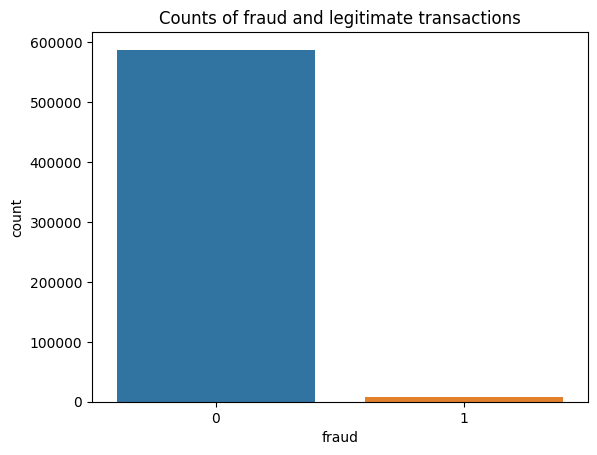

In [4]:
fraud_count=data[data['fraud']==1].shape[0]
notfraud_count=data['fraud'].shape[0]-fraud_count
print('Total fraud transactions count : {}'.format(fraud_count))
print('Total legitimate transactions count : {}'.format(notfraud_count))
sns.countplot(x='fraud',data=data)
plt.title('Counts of fraud and legitimate transactions')
plt.show()

Checking the count of fraud transactions across different age groups, category, gender to identify any patterns and understanding data

In [5]:
print(data.loc[data['fraud'] == 1,'age'].value_counts())
print(data.loc[data['fraud'] == 1,'category'].value_counts())
print(data.loc[data['fraud'] == 1,'gender'].value_counts())

age

'2'    2344

'3'    1755

'4'    1410

'1'     689

'5'     686

'6'     261

'0'      48

'U'       7

Name: count, dtype: int64

category

'es_sportsandtoys'         1982

'es_health'                1696

'es_wellnessandbeauty'      718

'es_travel'                 578

'es_hotelservices'          548

'es_leisure'                474

'es_home'                   302

'es_hyper'                  280

'es_otherservices'          228

'es_tech'                   158

'es_barsandrestaurants'     120

'es_fashion'                116

Name: count, dtype: int64

gender

'F'    4758

'M'    2435

'E'       7

Name: count, dtype: int64


In [6]:
data[data['fraud']==1]['amount'].mean()

530.9265513888889

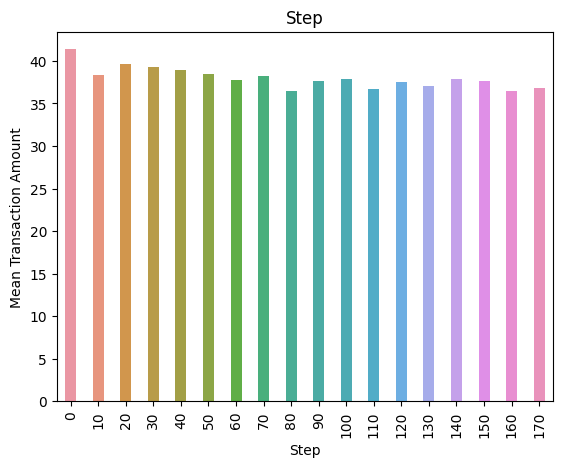

In [7]:
hist = [(data[(data['step'] < i+10) & (data['step'] >=i)]['amount'].mean().round(2)) for i in range(0, 180,10)]
hist_df = pd.DataFrame({'step': range(0, 180,10), 'mean_amount': hist})

# Plotting
sns.barplot(x='step', y='mean_amount', data=hist_df, width=0.4)
plt.xlabel('Step')
plt.ylabel('Mean Transaction Amount')
plt.title('Step')
plt.xticks(rotation=90)
plt.show()

Has higer 

Let's confirm this hypothesis by checking the fraud and non-fraud amount transacted.

In [8]:
print("Mean values of amount and fraud with respective category",data.groupby('category')[['amount'\
    ,'fraud']].mean())

Mean values of amount and fraud with respective category                               amount     fraud

category                                      

'es_barsandrestaurants'    43.461014  0.018829

'es_contents'              44.547571  0.000000

'es_fashion'               65.666642  0.017973

'es_food'                  37.070405  0.000000

'es_health'               135.621367  0.105126

'es_home'                 165.670846  0.152064

'es_hotelservices'        205.614249  0.314220

'es_hyper'                 45.970421  0.045917

'es_leisure'              288.911303  0.949900

'es_otherservices'        135.881524  0.250000

'es_sportsandtoys'        215.715280  0.495252

'es_tech'                 120.947937  0.066667

'es_transportation'        26.958187  0.000000

'es_travel'              2250.409190  0.793956

'es_wellnessandbeauty'     65.511221  0.047594


In [9]:
data_fraud=data[data['fraud']==1]
data_notfraud=data[data['fraud']==0]

**Our hypothesis that fraudsters choose categories where people spend more is only partly correct. However, as shown in the table below, we can confidently say that fraudulent transactions are significantly higher than the average for those categories.**

In [10]:
# Create two dataframes with fraud and non-fraud data 
pd.concat([data_fraud.groupby('category')['amount'].mean(),data_notfraud.groupby('category')['amount'].mean(),\
           data.groupby('category')['fraud'].mean()*100],keys=["Fraudulent","Non-Fraudulent","Percent(%)"],axis=1,\
          sort=False).sort_values(by=['Non-Fraudulent'])

,Fraudulent,Non-Fraudulent,Percent(%)
category,,,
'es_transportation',NaN,26.958187,0.000000
'es_food',NaN,37.070405,0.000000
'es_hyper',169.255429,40.037145,4.591669
'es_barsandrestaurants',164.092667,41.145997,1.882944
'es_contents',NaN,44.547571,0.000000
'es_wellnessandbeauty',229.422535,57.320219,4.759380
'es_fashion',247.008190,62.347674,1.797335
'es_leisure',300.286878,73.230400,94.989980
'es_otherservices',316.469605,75.685497,25.000000


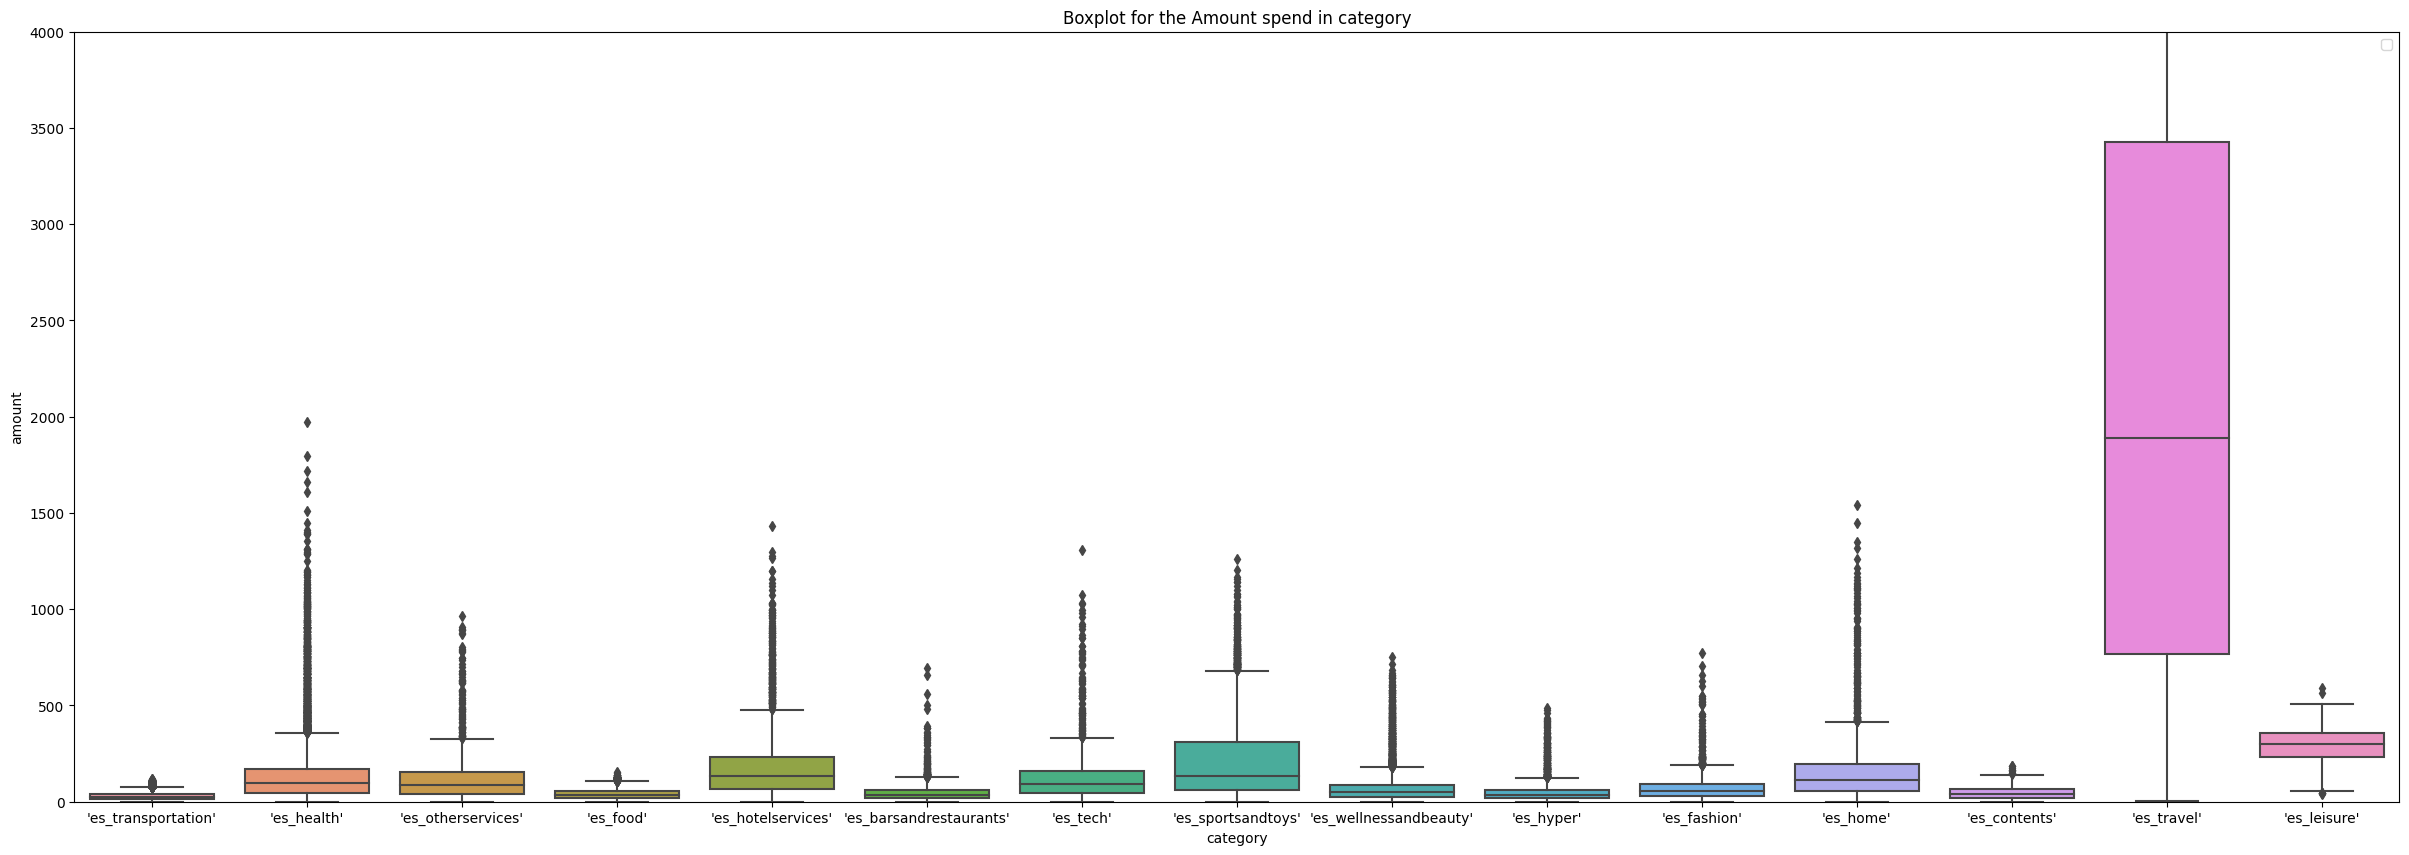

In [11]:
# Plot histograms of the amounts in fraud and non-fraud data 
plt.figure(figsize=(30,10))
sns.boxplot(x=data.category,y=data.amount)
plt.title("Boxplot for the Amount spend in category")
plt.ylim(0,4000)
plt.legend()
plt.show()

We can see in the histogram below the fradulent transactions are less in count but more in amount.

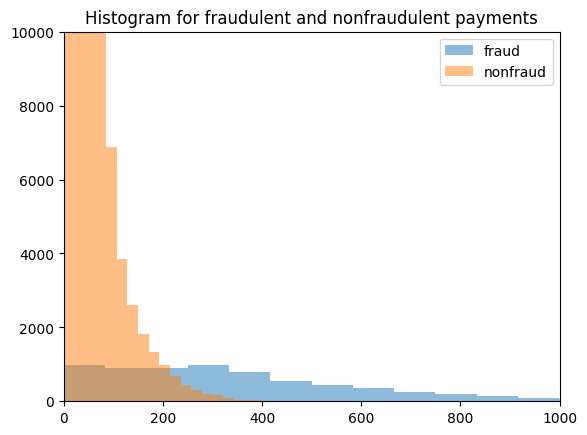

In [12]:
# Plot histograms of the amounts in fraud and non-fraud data 
plt.hist(data_fraud.amount, alpha=0.5, label='fraud',bins=100)
plt.hist(data_notfraud.amount, alpha=0.5, label='nonfraud',bins=100)
plt.title("Histogram for fraudulent and nonfraudulent payments")
plt.xlabel('')
plt.ylim(0,10000)
plt.xlim(0,1000)
plt.legend()
plt.show()

In [13]:
data_fraud.columns

Index(['step', 'customer', 'age', 'gender', 'zipcodeOri', 'merchant',
       'zipMerchant', 'category', 'amount', 'fraud'],
      dtype='object')

<Axes: xlabel='merchant', ylabel='count'>

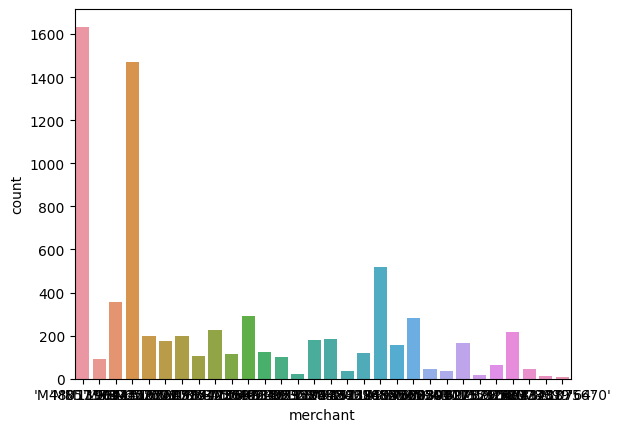

In [14]:
sns.countplot(data_fraud, x = 'merchant',)

Looks like fraud occurs more in ages equal and below 18(0th category). Can it be because of fraudsters thinking it would be less consequences if they show their age younger, or maybe they really are young.

In [15]:
print((data.groupby('age')['fraud'].mean()*100).reset_index().rename(columns={'age':'Age','fraud' : 'Fraud Percent'}).sort_values(by='Fraud Percent'))

   Age  Fraud Percent

7  'U'       0.594228

6  '6'       0.974826

5  '5'       1.095112

1  '1'       1.185254

3  '3'       1.192815

2  '2'       1.251401

4  '4'       1.293281

0  '0'       1.957586


# **Data Preprocessing**

There are only one unique zipCode values so we will drop them.

In [16]:
print("Unique zipCodeOri values: ",data.zipcodeOri.nunique())
print("Unique zipMerchant values: ",data.zipMerchant.nunique())
# dropping zipcodeori and zipMerchant since they have only one unique value
data_reduced = data.drop(['zipcodeOri','zipMerchant'],axis=1)

Unique zipCodeOri values:  1

Unique zipMerchant values:  1


In [17]:
data_reduced.dtypes

step          int64
customer     object
age          object
gender       object
merchant     object
category     object
amount      float64
fraud         int64
dtype: object

* Transformation of categorical features into numerical values.
* Here we will transform categorical features into numerical values. It is usually better to turn these type of categorical values into dummies because they have no relation in size(i.e. customer1 is not greater than customer2)

This transformation simplifies data analysis by treating categories as distinct, non-ordinal entities.


In [18]:
# turning object columns type to categorical for easing the transformation process
col_categorical = data_reduced.select_dtypes(include= ['object']).columns
for col in col_categorical:
    data_reduced[col] = data_reduced[col].astype('category')
# categorical values ==> numeric values
data_reduced[col_categorical] = data_reduced[col_categorical].apply(lambda x: x.cat.codes)
data_reduced.head(5)

,step,customer,age,gender,merchant,category,amount,fraud
0,0,210,4,2,30,12,4.55,0
1,0,2753,2,2,30,12,39.68,0
2,0,2285,4,1,18,12,26.89,0
3,0,1650,3,2,30,12,17.25,0
4,0,3585,5,2,30,12,35.72,0


Let's define our independent variable (X) and dependant/target variable y

In [19]:
X = data_reduced.drop(['fraud'],axis=1)
y = data['fraud']
print(X.head(),"\n")
print(y.head())

   step  customer  age  gender  merchant  category  amount

0     0       210    4       2        30        12    4.55

1     0      2753    2       2        30        12   39.68

2     0      2285    4       1        18        12   26.89

3     0      1650    3       2        30        12   17.25

4     0      3585    5       2        30        12   35.72 



0    0

1    0

2    0

3    0

4    0

Name: fraud, dtype: int64


# **Oversampling with SMOTE**

Using SMOTE for balancing the dataset. Resulted counts show that now we have exact number of class instances (1 and 0).

In [20]:
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=42)
X_resample, y_resample = sm.fit_resample(X, y)
y_resample =  np.reshape(y_resample, (-1, 1))
y_resample = pd.DataFrame(y_resample)

print(y_resample[0].value_counts())

0

0    587443

1    587443

Name: count, dtype: int64


Splitting data in training and testing data using startify to generalize both data

In [21]:
# I won't do cross validation since we have a lot of instances
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_resample,y_resample,test_size=0.3,random_state=42,shuffle=True,stratify=y_resample)

Fraud detection often involves imbalanced datasets, where non-fraudulent cases vastly outnumber fraudulent ones.

With the baseline accuracy approaching 99% by predicting only non-fraudulent cases, this approach is ineffective for detecting fraud, despite seeming high accuracy.

Effective fraud detection requires a model that exceeds the baseline accuracy to identify actual fraud cases.

Our model needs to demonstrate a significant improvement over this baseline to be practically useful in real-world fraud detection scenarios.

In [22]:
print("Base accuracy score we must beat is: ", 
      (notfraud_count/ (notfraud_count+fraud_count)) * 100)

Base accuracy score we must beat is:  98.7891894800746


Defining a function for plotting the ROC_AUC curve. It is a good visual way to see the classification performance.

In [23]:
from sklearn.metrics import roc_curve, auc
def plot_roc_auc(y_test, preds):
    '''
    Takes actual and predicted(probabilities) as input and plots the Receiver
    Operating Characteristic (ROC) curve
    '''
    fpr, tpr, threshold = roc_curve(y_test, preds)
    roc_auc = auc(fpr, tpr)
    plt.title('Receiver Operating Characteristic')
    plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()

# **K-Neighbours Classifier**

In [24]:
#  K-ello Neigbors
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, roc_auc_score,f1_score,precision_score
knn = KNeighborsClassifier(n_neighbors=5,p=1)

knn.fit(X_train,y_train)

/opt/conda/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

  return self._fit(X, y)


KNeighborsClassifier(p=1)

Classification Report for K-Nearest Neighbours: 

               precision    recall  f1-score   support



           0       1.00      0.98      0.99    176233

           1       0.98      1.00      0.99    176233



    accuracy                           0.99    352466

   macro avg       0.99      0.99      0.99    352466

weighted avg       0.99      0.99      0.99    352466



Confusion Matrix of K-Nearest Neigbours: 

 [[171999   4234]

 [   362 175871]]

F1 Score: 0.98710

Precision: 0.97649


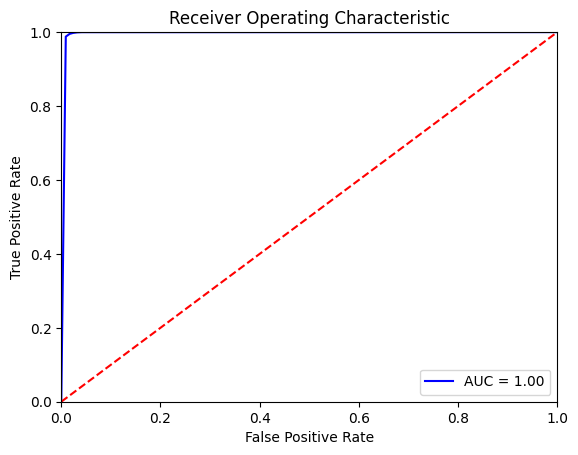

In [25]:
y_pred = knn.predict(X_test)

print("Classification Report for K-Nearest Neighbours: \n", classification_report(y_test, y_pred))
print("Confusion Matrix of K-Nearest Neigbours: \n", confusion_matrix(y_test,y_pred))
print(f"F1 Score: {f1_score(y_test, y_pred):.5f}")
precision = precision_score(y_test, y_pred)
print(f"Precision: {precision:.5f}")

plot_roc_auc(y_test, knn.predict_proba(X_test)[:,1])

In [26]:
from sklearn.metrics import average_precision_score
print('AUPRC = {}'.format(average_precision_score(y_test, knn.predict_proba(X_test)[:,1])))

AUPRC = 0.9906591690078677


# **Combined model of Random Forest Classifier + Gradient Boosting Classifier**

In [27]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.preprocessing import StandardScaler

# feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initializing the models
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
gb_model = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42)

# Training the Random Forest model
rf_model.fit(X_train, y_train)
# Training the Gradient Boosting model
gb_model.fit(X_train_scaled, y_train)

rf_predictions = rf_model.predict(X_test)
gb_predictions = gb_model.predict(X_test_scaled)
final_predictions = (rf_predictions + gb_predictions) / 2
final_predictions = np.round(final_predictions)
print("Random Forest Classification Report:")
print(classification_report(y_test, rf_predictions))
print("Gradient Boosting Classification Report:")
print(classification_report(y_test, gb_predictions))

# Evaluating the combined predictions
print("Combined Model Classification Report:")
print(classification_report(y_test, final_predictions))

rf_roc_auc = roc_auc_score(y_test, rf_model.predict_proba(X_test)[:, 1])
gb_roc_auc = roc_auc_score(y_test, gb_model.predict_proba(X_test_scaled)[:, 1])
combined_roc_auc = roc_auc_score(y_test, (rf_model.predict_proba(X_test)[:, 1] + gb_model.predict_proba(X_test_scaled)[:, 1]) / 2)

print(f"Random Forest ROC AUC Score: {rf_roc_auc:.4f}")
print(f"Gradient Boosting ROC AUC Score: {gb_roc_auc:.4f}")
print(f"Combined Model ROC AUC Score: {combined_roc_auc:.4f}")

print("Confusion Matrix of Combined Model: \n", confusion_matrix(y_test,final_predictions))
f1 = f1_score(y_test, final_predictions)
print(f"F1 Score: {f1:.2f}")
precision = precision_score(y_test, y_pred)
print(f"Precision: {precision:.5f}")

/tmp/ipykernel_33/2366091064.py:14: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

  rf_model.fit(X_train, y_train)

/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

  y = column_or_1d(y, warn=True)


Random Forest Classification Report:

              precision    recall  f1-score   support



           0       1.00      0.99      1.00    176233

           1       0.99      1.00      1.00    176233



    accuracy                           1.00    352466

   macro avg       1.00      1.00      1.00    352466

weighted avg       1.00      1.00      1.00    352466



Gradient Boosting Classification Report:

              precision    recall  f1-score   support



           0       0.99      0.97      0.98    176233

           1       0.97      0.99      0.98    176233



    accuracy                           0.98    352466

   macro avg       0.98      0.98      0.98    352466

weighted avg       0.98      0.98      0.98    352466



Combined Model Classification Report:

              precision    recall  f1-score   support



           0       0.99      0.99      0.99    176233

           1       0.99      0.99      0.99    176233



    accuracy                           0

# **XGBoost Classifier**

/opt/conda/lib/python3.10/site-packages/xgboost/core.py:160: UserWarning: [12:41:45] WARNING: /workspace/src/learner.cc:742: 

Parameters: { "scale_pos_weight" } are not used.



  warnings.warn(smsg, UserWarning)


Classification Report for XGBoost: 

               precision    recall  f1-score   support



           0       1.00      0.99      0.99    176233

           1       0.99      1.00      0.99    176233



    accuracy                           0.99    352466

   macro avg       0.99      0.99      0.99    352466

weighted avg       0.99      0.99      0.99    352466



Confusion Matrix of XGBoost: 

 [[174100   2133]

 [   787 175446]]


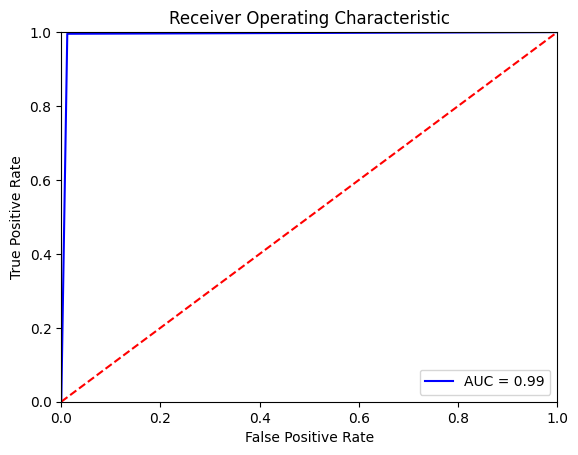

In [28]:
import xgboost as xgb
XGBoost_CLF = xgb.XGBClassifier(max_depth=6, learning_rate=0.05, n_estimators=400, 
                                objective="binary:hinge", booster='gbtree', 
                                n_jobs=-1, gamma=0, min_child_weight=1, max_delta_step=0, 
                                subsample=1, colsample_bytree=1, colsample_bylevel=1, reg_alpha=0, reg_lambda=1, 
                                scale_pos_weight=1, base_score=0.5, random_state=42, verbosity=1)

XGBoost_CLF.fit(X_train,y_train)

y_pred = XGBoost_CLF.predict(X_test)

print("Classification Report for XGBoost: \n", classification_report(y_test, y_pred))
print("Confusion Matrix of XGBoost: \n", confusion_matrix(y_test,y_pred))
plot_roc_auc(y_test, XGBoost_CLF.predict_proba(X_test)[:,1])

# **Bagging Classifier with Decision Tree Base Estimator**

In [29]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

base_model = DecisionTreeClassifier()

# Create the Bagging Classifier
bagging_model = BaggingClassifier(base_estimator=base_model, n_estimators=50, random_state=42)

bagging_model.fit(X_train, y_train)

# Make predictions
y_pred = bagging_model.predict(X_test)

# Evaluate
accuracy = accuracy_score(y_test, y_pred)
print(f"Bagging Accuracy: {accuracy:.5f}")

print("Confusion Matrix of Bagging Classifier: \n", confusion_matrix(y_test,y_pred))
f1 = f1_score(y_test, y_pred)
print(f"F1 Score: {f1:.5f}")
precision = precision_score(y_test, y_pred)
print(f"Precision: {precision:.5f}")

/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_bagging.py:802: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

  y = column_or_1d(y, warn=True)

/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.

  warnings.warn(


Bagging Accuracy: 0.99510

Confusion Matrix of Bagging Classifier: 

 [[174939   1294]

 [   432 175801]]

F1 Score: 0.99512

Precision: 0.99269


# **Stacking Classifier with Random Forest, Decision Tree, and Gradient Boosting as Base Models**

In [30]:
from sklearn.ensemble import StackingClassifier, GradientBoostingClassifier, RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
base_estimators = [
    ('rf', RandomForestClassifier(n_estimators=100, random_state=42)),
    ('dt', DecisionTreeClassifier(random_state=42)),
    ('gb', GradientBoostingClassifier(n_estimators=100, random_state=42))
]

# Define the meta-model
meta_model = LogisticRegression()

# Create the Stacking Classifier
stacking_model = StackingClassifier(estimators=base_estimators, final_estimator=meta_model)

# Training
stacking_model.fit(X_train, y_train)

# Make predictions
y_pred = stacking_model.predict(X_test)

# Evaluate
accuracy = accuracy_score(y_test, y_pred)
print(f"Stacking Classifier Accuracy: {accuracy:.5f}")

print("Confusion Matrix of Stacking Classifier: \n", confusion_matrix(y_test,y_pred))
f1 = f1_score(y_test, y_pred)
print(f"F1 Score: {f1:.5f}")
precision = precision_score(y_test, y_pred)
print(f"Precision: {precision:.5f}")

/opt/conda/lib/python3.10/site-packages/sklearn/preprocessing/_label.py:99: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

  y = column_or_1d(y, warn=True)

/opt/conda/lib/python3.10/site-packages/sklearn/preprocessing/_label.py:134: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


Stacking Classifier Accuracy: 0.99610

Confusion Matrix of Stacking Classifier: 

 [[175315    918]

 [   457 175776]]

F1 Score: 0.99610

Precision: 0.99480


# **Voting Classifier with Random Forest, AdaBoost, and Gradient Boosting**

In [31]:
from sklearn.ensemble import AdaBoostClassifier, VotingClassifier


# Individual ensemble models
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
adaboost_model = AdaBoostClassifier(n_estimators=50, random_state=42)
gb_model = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42)

# Create the Voting Classifier combining the ensemble methods
voting_model = VotingClassifier(estimators=[
    ('rf', rf_model),
    ('adaboost', adaboost_model),
    ('gb', gb_model)
], voting='soft')  # 'soft' voting uses predicted probabilities

# Train the combined model
voting_model.fit(X_train, y_train)

# Make predictions
y_pred = voting_model.predict(X_test)

# Evaluate
accuracy = accuracy_score(y_test, y_pred)
print(f"Combined Voting Classifier Accuracy: {accuracy:.5f}")


print("Confusion Matrix of Combined model(Random froest, ada classifier, Graident boosting): \n", confusion_matrix(y_test,y_pred))
f1 = f1_score(y_test, y_pred)
print(f"F1 Score: {f1:.5f}")
precision = precision_score(y_test, y_pred)
print(f"Precision: {precision:.5f}")

/opt/conda/lib/python3.10/site-packages/sklearn/preprocessing/_label.py:99: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

  y = column_or_1d(y, warn=True)

/opt/conda/lib/python3.10/site-packages/sklearn/preprocessing/_label.py:134: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


Combined Voting Classifier Accuracy: 0.99067

Confusion Matrix of Combined model(Random froest, ada classifier, Graident boosting): 

 [[173447   2786]

 [   502 175731]]

F1 Score: 0.99073

Precision: 0.98439


# CONCLUSION

In our fraud detection project using bank payment data, we effectively addressed the class imbalance issue through SMOTE and extensive exploratory data analysis (EDA). By applying and comparing various classifiers, we identified the most effective model for detecting fraud. Given that our approach involves a continuous data model, it provides a robust and adaptable solution for real-time fraud detection. The improvements achieved not only surpass baseline accuracy but also offer valuable insights and practical benefits for real-world banking applications.